# Exploratory Data Analysis do grafo populado

In [2]:

#!pip install --upgrade pip
#!pip install matplotlib

In [1]:
from langchain_community.graphs import Neo4jGraph
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt

Conectando NEO4J

In [3]:
load_dotenv()

# Neo4j variables
NEO4J_URL = os.getenv("NEO4J_URL")
NEO4J_USERNAME =os.getenv("NEO4J_USERNAME")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

#Connecting to the graph
graph = Neo4jGraph(
    url=NEO4J_URL,
    username=NEO4J_USERNAME,
    password=NEO4J_PASSWORD
)

Estatísticas Iniciais

In [4]:
#Total de teses no grafo
total_thesis = len(graph.query("""
MATCH (thesis:Thesis)
RETURN thesis.uri
"""))

print(f'Total de teses no grafo: {total_thesis}')

Total de teses no grafo: 23073


In [5]:
#Total de excerpts no grafo (páginas extraídas de cada tese)
total_excerpts = len(graph.query("""
MATCH (excerpt:Excerpt)
RETURN excerpt.uri
"""))

print(f'Total de excerpts no grafo (páginas extraídas de cada tese): {total_excerpts}')

Total de excerpts no grafo (páginas extraídas de cada tese): 2347487


In [6]:
#Total de teses com excerpts no grafo
total_teses_com_excerpts = len(graph.query("""
MATCH (excerpt:Excerpt)--(thesis:Thesis)
RETURN DISTINCT(thesis.uri)
"""))

print(f'Total de teses com excerpts no grafo: {total_teses_com_excerpts}')

Total de teses com excerpts no grafo: 12950


In [8]:
#Total de teses por universidades
teses_por_universidade = graph.query("""
MATCH (thesis:Thesis)--(uni:University)
RETURN COUNT(distinct(thesis.uri)) as Total_teses, uni.label as Universidade
ORDER BY Total_teses DESC
""")
teses_por_universidade = pd.DataFrame(teses_por_universidade, columns=['Total_teses', 'Universidade'])
print ('Total de universidades:', len(teses_por_universidade))
teses_por_universidade.head(10)

Total de universidades: 136


,Total_teses,Universidade
0,2208,Universidade de São Paulo (USP)
1,1221,Universidade de Brasília (UnB)
2,1049,Universidade Estadual de Campinas (UNICAMP)
3,957,Universidade Federal da Bahia (UFBA)
4,955,Universidade Federal do Rio Grande do Sul (UFRGS)
5,790,Universidade Federal de Santa Catarina (UFSC)
6,779,Universidade Estadual Paulista (UNESP)
7,744,Universidade Federal de Minas Gerais (UFMG)
8,710,Universidade Federal Rural do Rio de Janeiro (...
9,688,Pontifícia Universidade Católica de São Paulo ...


In [20]:
#Total de teses com excerpts por universidades
teses_por_universidade = graph.query("""
MATCH (thesis:Thesis)--(excerpt:Excerpt)
MATCH (thesis:Thesis)--(uni:University)
RETURN COUNT(distinct(thesis.uri)) as Total_teses, uni.label as Universidade
ORDER BY Total_teses DESC
""")
teses_por_universidade = pd.DataFrame(teses_por_universidade, columns=['Total_teses', 'Universidade'])
print ('Total de universidades:', len(teses_por_universidade))
teses_por_universidade

Total de universidades: 29


,Total_teses,Universidade
0,2166,Universidade de São Paulo (USP)
1,1209,Universidade de Brasília (UnB)
2,870,Universidade Federal da Bahia (UFBA)
3,775,Universidade Estadual Paulista (UNESP)
4,765,Universidade Federal de Santa Catarina (UFSC)
5,733,Universidade Federal de Minas Gerais (UFMG)
6,708,Universidade Federal Rural do Rio de Janeiro (...
7,678,Pontifícia Universidade Católica de São Paulo ...
8,564,Universidade Federal de Pernambuco (UFPE)
9,552,Universidade Estadual de Campinas (UNICAMP)


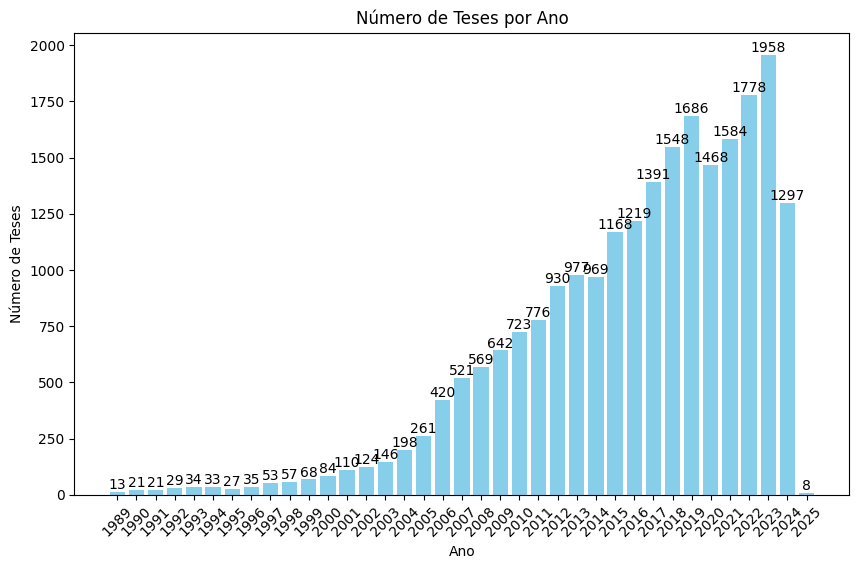

In [21]:
#Total de teses no grafo por ano
teses_por_ano = graph.query("""
MATCH (thesis:Thesis)
RETURN COUNT(distinct(thesis.uri)) as Total_teses, thesis.created as Ano
ORDER BY thesis.created
""")

teses_por_ano = pd.DataFrame(teses_por_ano, columns=['Total_teses', 'Ano'])
teses_por_ano['Ano'] = teses_por_ano['Ano'].astype(str)

#plotting the number of theses with excerpts per year
plt.figure(figsize=(10,6))

# Create the bar chart and store the bar container
bars = plt.bar(teses_por_ano['Ano'][25:], teses_por_ano['Total_teses'][25:], color='skyblue')

# Add labels to each bar
plt.bar_label(bars)

plt.xlabel('Ano')
plt.ylabel('Número de Teses')
plt.title('Número de Teses por Ano')
plt.xticks(rotation=45)
plt.show()

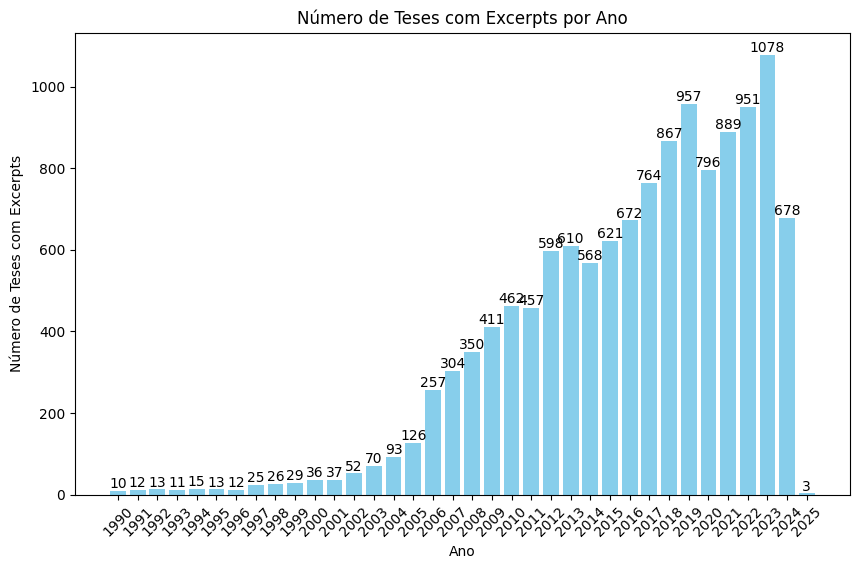

In [22]:
#Total de teses com excerpts no grafo por ano
teses_com_excerpts_por_ano = graph.query("""
MATCH (excerpt:Excerpt)--(thesis:Thesis)
RETURN COUNT(distinct(thesis.uri)) as Total_teses, thesis.created as Ano
ORDER BY thesis.created
""")

teses_com_excerpts_por_ano = pd.DataFrame(teses_com_excerpts_por_ano, columns=['Total_teses', 'Ano'])
teses_com_excerpts_por_ano['Ano'] = teses_com_excerpts_por_ano['Ano'].astype(str)

#plotting the number of theses with excerpts per year
plt.figure(figsize=(10,6))

# Create the bar chart and store the bar container
bars = plt.bar(teses_com_excerpts_por_ano['Ano'][25:], teses_com_excerpts_por_ano['Total_teses'][25:], color='skyblue')

# Add labels to each bar
plt.bar_label(bars)

plt.xlabel('Ano')
plt.ylabel('Número de Teses com Excerpts')
plt.title('Número de Teses com Excerpts por Ano')
plt.xticks(rotation=45)
plt.show()

In [23]:

tese_PUCSP = pd.read_csv('data/BDTD_nov2025/PUCSP.csv')
tese_PUCSP = tese_PUCSP.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UERJ = pd.read_csv('data/BDTD_nov2025/UERJ.csv')
tese_UERJ = tese_UERJ.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFAM = pd.read_csv('data/BDTD_nov2025/UFAM.csv')
tese_UFAM = tese_UFAM.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFBA = pd.read_csv('data/BDTD_nov2025/UFBA.csv')
tese_UFBA = tese_UFBA.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFF = pd.read_csv('data/BDTD_nov2025/UFF.csv')
tese_UFF = tese_UFF.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFG = pd.read_csv('data/BDTD_nov2025/UFG.csv')
tese_UFG = tese_UFG.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFMG = pd.read_csv('data/BDTD_nov2025/UFMG.csv')
tese_UFMG = tese_UFMG.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFPA = pd.read_csv('data/BDTD_nov2025/UFPA.csv')
tese_UFPA = tese_UFPA.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFPB = pd.read_csv('data/BDTD_nov2025/UFPB.csv')
tese_UFPB = tese_UFPB.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFPE = pd.read_csv('data/BDTD_nov2025/UFPE.csv')
tese_UFPE = tese_UFPE.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFPR = pd.read_csv('data/BDTD_nov2025/UFPR.csv')
tese_UFPR = tese_UFPR.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFRGS = pd.read_csv('data/BDTD_nov2025/UFRGS.csv')
tese_UFRGS = tese_UFRGS.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFRRJ = pd.read_csv('data/BDTD_nov2025/UFRRJ.csv')
tese_UFRRJ = tese_UFRRJ.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFSC = pd.read_csv('data/BDTD_nov2025/UFSC.csv')
tese_UFSC = tese_UFSC.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UFSCAR = pd.read_csv('data/BDTD_nov2025/UFSCAR.csv')
tese_UFSCAR = tese_UFSCAR.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UNB = pd.read_csv('data/BDTD_nov2025/UNB.csv')
tese_UNB = tese_UNB.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UNESP = pd.read_csv('data/BDTD_nov2025/UNESP.csv')
tese_UNESP = tese_UNESP.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_UNICAMP = pd.read_csv('data/BDTD_nov2025/UNICAMP.csv')
tese_UNICAMP = tese_UNICAMP.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()
tese_USP = pd.read_csv('data/BDTD_nov2025/USP.csv')
tese_USP = tese_USP.groupby(['Ano de defesa', 'Instituição de defesa']).size().reset_index()

tese_top_universities = pd.concat([tese_PUCSP, tese_UERJ, tese_UFAM,
                                    tese_UFBA, tese_UFF, tese_UFG, tese_UFMG,
                                    tese_UFPA, tese_UFPB, tese_UFPE, tese_UFPR,
                                    tese_UFRGS, tese_UFRRJ, tese_UFSC, tese_UFSCAR,
                                    tese_UNB, tese_UNESP, tese_UNICAMP, tese_USP]).reset_index()
tese_top_universities

,index,Ano de defesa,Instituição de defesa,0
0,0,1975.0,Pontifícia Universidade Católica de São Paulo ...,1
1,1,1978.0,Pontifícia Universidade Católica de São Paulo ...,1
2,2,1980.0,Pontifícia Universidade Católica de São Paulo ...,1
3,3,1982.0,Pontifícia Universidade Católica de São Paulo ...,2
4,4,1983.0,Pontifícia Universidade Católica de São Paulo ...,4
...,...,...,...,...
988,75,2020.0,Universidade de São Paulo (USP),3863
989,76,2021.0,Universidade de São Paulo (USP),3875
990,77,2022.0,Universidade de São Paulo (USP),4161
991,78,2023.0,Universidade de São Paulo (USP),4207


In [24]:
tese_top_universities = tese_top_universities[['Ano de defesa', 0]].groupby('Ano de defesa').sum().reset_index()
tese_top_universities = tese_top_universities.rename(columns={0: 'Total_teses', 'Ano de defesa': 'Ano'})
tese_top_universities['Ano'] = tese_top_universities['Ano'].astype(int).astype(str) #.apply(int).apply(str)
#tese_top_universities

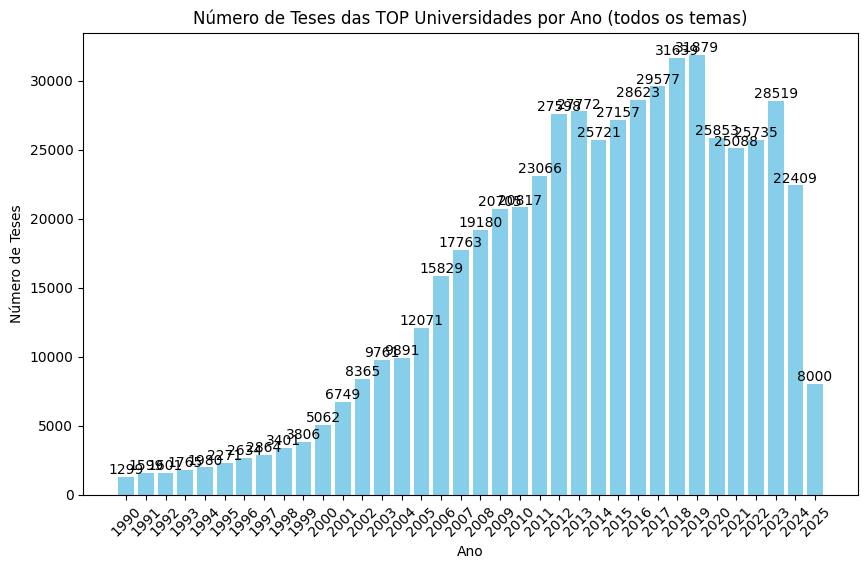

In [25]:
#teses_por_ano = pd.DataFrame(tese_USP, columns=['Ano', 'Instituição de defesa', 'Total_teses'])

#plotting the number of theses with excerpts per year
plt.figure(figsize=(10,6))

# Create the bar chart and store the bar container
bars = plt.bar(tese_top_universities['Ano'][91:], tese_top_universities['Total_teses'][91:], color='skyblue')

# Add labels to each bar
plt.bar_label(bars)

plt.xlabel('Ano')
plt.ylabel('Número de Teses')
plt.title('Número de Teses das TOP Universidades por Ano (todos os temas)')
plt.xticks(rotation=45)
plt.show()

In [26]:
#proporcao_de_teses = pd.merge(tese_top_universities, teses_por_ano, on='Ano', how='left', suffixes=('_todos_temas', '_todas_as_teses'))
proporcao_de_teses = pd.merge(tese_top_universities, teses_por_ano, on='Ano', how='left', suffixes=('_todos_temas', '_no_grafo'))
proporcao_de_teses = pd.merge(proporcao_de_teses, teses_com_excerpts_por_ano, on='Ano', how='left', suffixes=('', '_teses_com_excerpts'))
#tese_top_universities.join(teses_por_ano, on='Ano', how='left', lsuffix='_todos_temas', rsuffix='_todas_as_teses')
proporcao_de_teses.rename(columns={'Total_teses': 'Total_teses_no_grafo_com_excerpts'}, inplace=True)
proporcao_de_teses['teses_no_grafo_por_todos_os_temas'] = (proporcao_de_teses['Total_teses_no_grafo'] / proporcao_de_teses['Total_teses_todos_temas']) * 100
proporcao_de_teses['teses_no_grafo_por_todos_os_temas'] = proporcao_de_teses['teses_no_grafo_por_todos_os_temas'].round(decimals=2)
proporcao_de_teses['Total_teses_no_grafo_com_excerpts_por_todos_os_temas'] = (proporcao_de_teses['Total_teses_no_grafo_com_excerpts'] / proporcao_de_teses['Total_teses_todos_temas']) * 100
proporcao_de_teses['Total_teses_no_grafo_com_excerpts_por_todos_os_temas'] = proporcao_de_teses['Total_teses_no_grafo_com_excerpts_por_todos_os_temas'].round(decimals=2)
#proporcao_de_teses

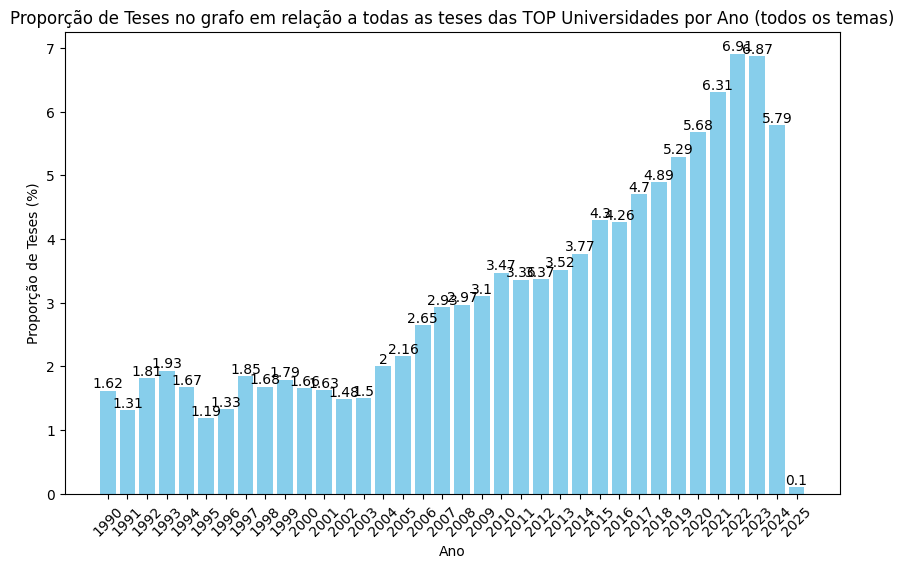

In [27]:
#teses_por_ano = pd.DataFrame(tese_USP, columns=['Ano', 'Instituição de defesa', 'Total_teses'])

#plotting the number of theses with excerpts per year
plt.figure(figsize=(10,6))

# Create the bar chart and store the bar container
bars = plt.bar(proporcao_de_teses['Ano'][91:], proporcao_de_teses['teses_no_grafo_por_todos_os_temas'][91:], color='skyblue')

# Add labels to each bar
plt.bar_label(bars)

plt.xlabel('Ano')
plt.ylabel('Proporção de Teses (%)')
plt.title('Proporção de Teses no grafo em relação a todas as teses das TOP Universidades por Ano (todos os temas)')
plt.xticks(rotation=45)
plt.show()

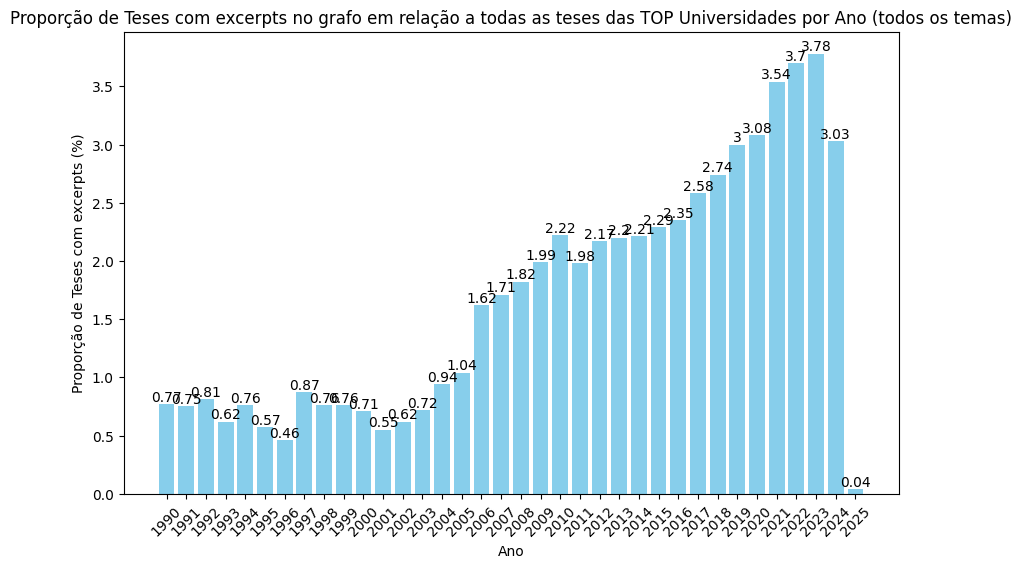

In [28]:
#teses_por_ano = pd.DataFrame(tese_USP, columns=['Ano', 'Instituição de defesa', 'Total_teses'])

#plotting the number of theses with excerpts per year
plt.figure(figsize=(10,6))

# Create the bar chart and store the bar container
bars = plt.bar(proporcao_de_teses['Ano'][91:], proporcao_de_teses['Total_teses_no_grafo_com_excerpts_por_todos_os_temas'][91:], color='skyblue')

# Add labels to each bar
plt.bar_label(bars)

plt.xlabel('Ano')
plt.ylabel('Proporção de Teses com excerpts (%)')
plt.title('Proporção de Teses com excerpts no grafo em relação a todas as teses das TOP Universidades por Ano (todos os temas)')
plt.xticks(rotation=45)
plt.show()

Assuntos CNPQ

In [23]:
# Função para plotar os assuntos CNPQ

def cnpq_plot(CNPQ_nivel):

    total_teses = []
    CNPQ_nivel_label = []

    for uri in CNPQ_nivel:

        total_teses.append(len(graph.query("""
        MATCH (n0:CNPQ{uri:'""" + uri + """'})-[:BFO_0000051]->(n1:CNPQ)-[:BFO_0000051]->(n2:CNPQ)-[:BFO_0000051]->(n3:CNPQ)--(t:Thesis) 
        Return t.uri
        UNION
        MATCH (n0:CNPQ{uri:'""" + uri + """'})-[:BFO_0000051]->(n1:CNPQ)-[:BFO_0000051]->(n2:CNPQ)--(t:Thesis) 
        Return t.uri
        UNION
        MATCH (n0:CNPQ{uri:'""" + uri + """'})-[:BFO_0000051]->(n1:CNPQ)--(t:Thesis) 
        Return t.uri
        UNION
        MATCH (n0:CNPQ{uri:'""" + uri + """'})--(t:Thesis) 
        Return t.uri
        """)))
        CNPQ_nivel_label.append(uri.replace('tag:stardog:api:', ''))

    # FAzendo um grafico de barras com o total de teses por área do conhecimento
    plt.figure(figsize=(10, 6))
    bars = plt.bar(CNPQ_nivel_label, total_teses, color='skyblue')

    # Add labels to each bar
    plt.bar_label(bars)
    plt.xticks(rotation=45)
    plt.show()

Assuntos CNPQ level 0

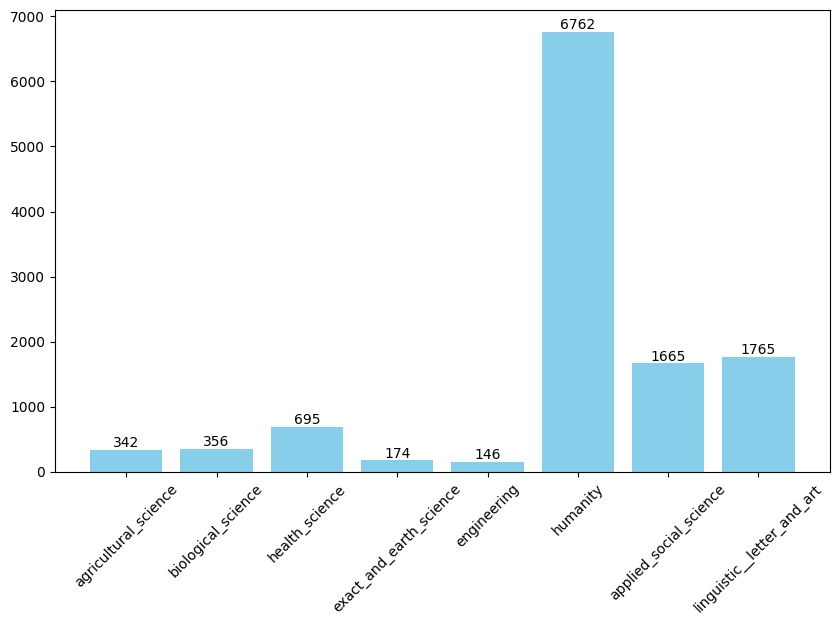

In [15]:
# Áreas do conhecimento CNPQ (https://lattes.cnpq.br/web/dgp/arvore-do-conhecimento)

CNPQ_nivel_0  = [
    'tag:stardog:api:agricultural_science',
    'tag:stardog:api:biological_science', 
    'tag:stardog:api:health_science', 
    'tag:stardog:api:exact_and_earth_science', 
    'tag:stardog:api:engineering', 
    'tag:stardog:api:humanity', 
    'tag:stardog:api:applied_social_science', 
    'tag:stardog:api:linguistic__letter_and_art']



cnpq_plot(CNPQ_nivel_0)

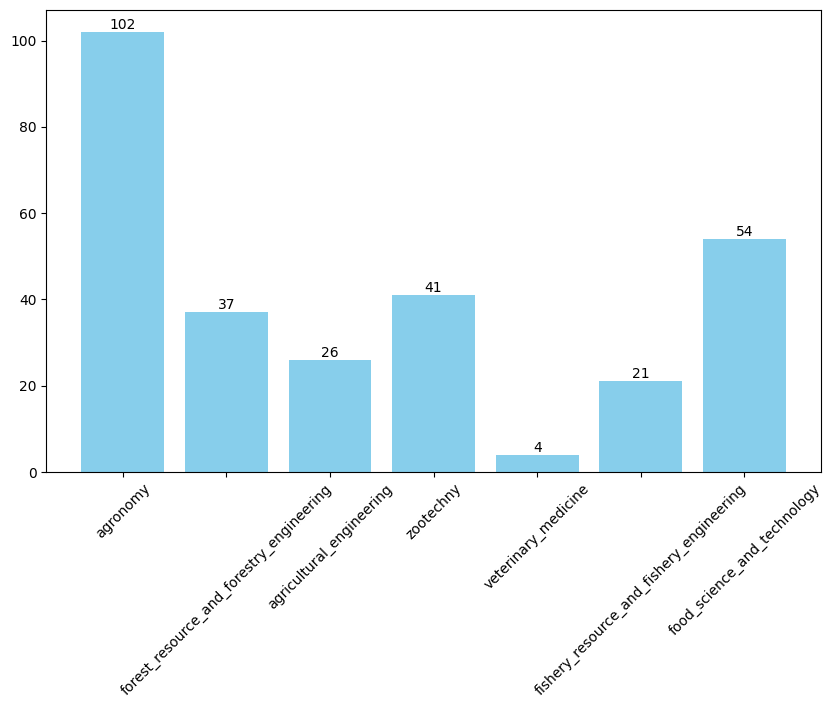

In [16]:
# Ciências Agrárias

CNPQ_nivel_1  = [
    'tag:stardog:api:agronomy',
    'tag:stardog:api:forest_resource_and_forestry_engineering',
    'tag:stardog:api:agricultural_engineering',
    'tag:stardog:api:zootechny',
    'tag:stardog:api:veterinary_medicine',
    'tag:stardog:api:fishery_resource_and_fishery_engineering',
    'tag:stardog:api:food_science_and_technology']

cnpq_plot(CNPQ_nivel_1)

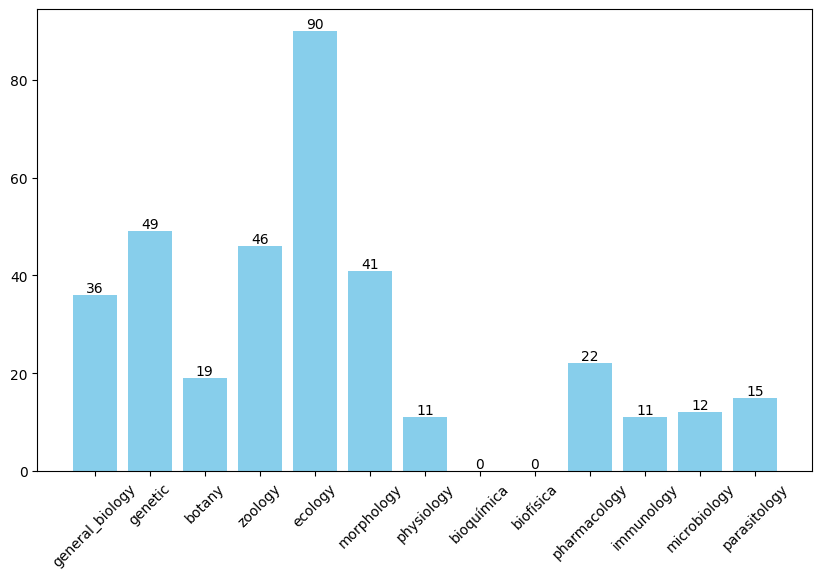

In [ ]:
# Ciências Biológicas

CNPQ_nivel_1  = [
    'tag:stardog:api:general_biology',
    'tag:stardog:api:genetic',
    'tag:stardog:api:botany',
    'tag:stardog:api:zoology',
    'tag:stardog:api:ecology',
    'tag:stardog:api:morphology',
    'tag:stardog:api:physiology', 
    'bioquímica',
    'biofísica',
    'tag:stardog:api:pharmacology',
    'tag:stardog:api:immunology',
    'tag:stardog:api:microbiology', 
    'tag:stardog:api:parasitology'
    ]

cnpq_plot(CNPQ_nivel_1)

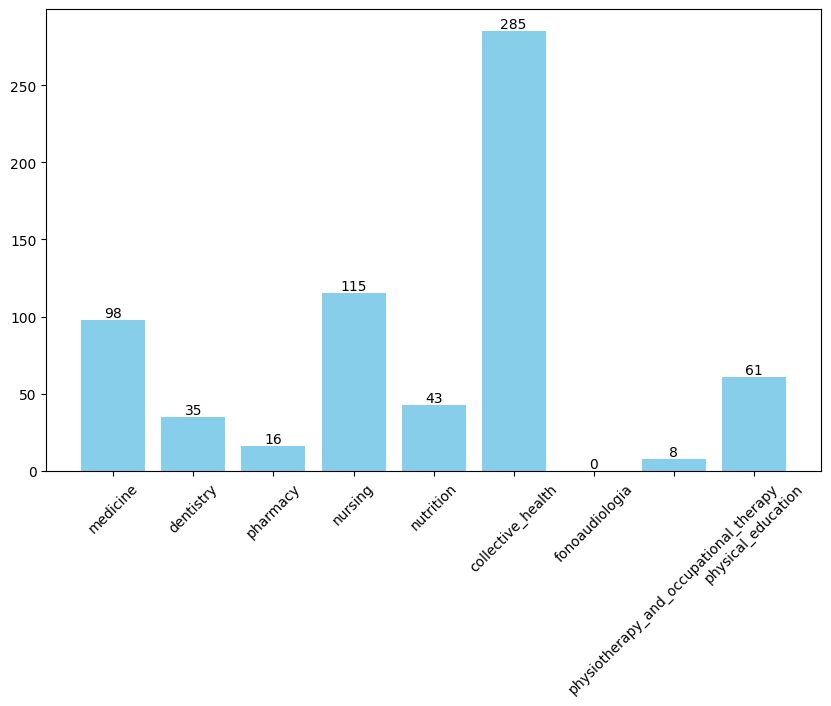

In [29]:
# Ciências da Saúde

CNPQ_nivel_1  = [
    'tag:stardog:api:medicine',
    'tag:stardog:api:dentistry',
    'tag:stardog:api:pharmacy',
    'tag:stardog:api:nursing',
    'tag:stardog:api:nutrition',
    'tag:stardog:api:collective_health',
    'fonoaudiologia',
    'tag:stardog:api:physiotherapy_and_occupational_therapy',
    'tag:stardog:api:physical_education'
    ]

cnpq_plot(CNPQ_nivel_1)

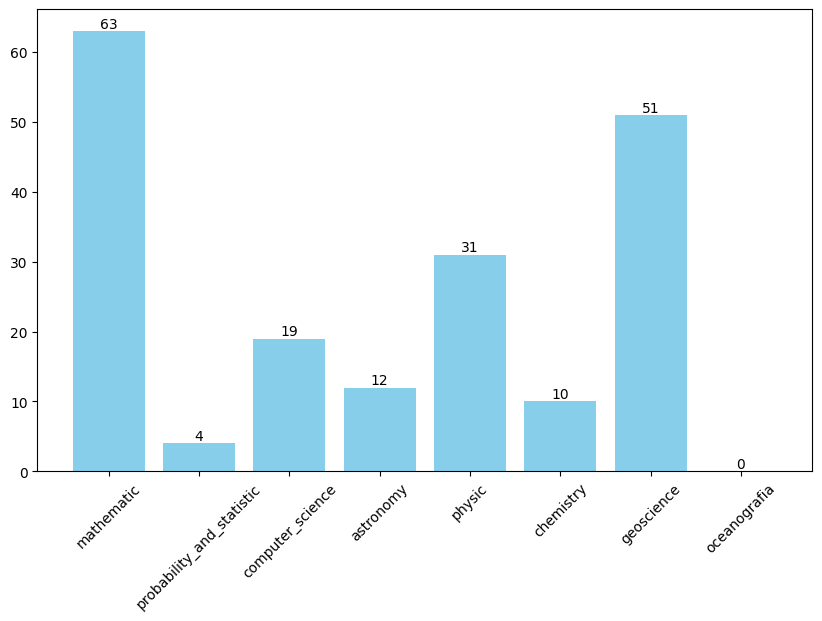

In [38]:
# Ciências Exatas e da Terra

CNPQ_nivel_1  = [
    'tag:stardog:api:mathematic',
    'tag:stardog:api:probability_and_statistic',
    'tag:stardog:api:computer_science',
    'tag:stardog:api:astronomy',
    'tag:stardog:api:physic',
    'tag:stardog:api:chemistry',
    'tag:stardog:api:geoscience',
    'oceanografia'  
    ]

cnpq_plot(CNPQ_nivel_1)

In [30]:
assuntos_CNPQ_nivel_1 = graph.query("""
MATCH (n0:CNPQ{uri:'tag:stardog:api:exact_and_earth_science'})-[:BFO_0000051]->(n1:CNPQ)
RETURN n1.uri as uri, n1.label as label
""")
assuntos_CNPQ_nivel_1

[{'uri': 'tag:stardog:api:astronomy', 'label': 'ASTRONOMIA'},
 {'uri': 'tag:stardog:api:geology', 'label': 'GEOLOGIA'},
 {'uri': 'tag:stardog:api:geoscience', 'label': 'GEOCIENCIAS'},
 {'uri': 'tag:stardog:api:physical', 'label': 'FISICA'},
 {'uri': 'tag:stardog:api:computer_science', 'label': 'CIENCIA DA COMPUTACAO'},
 {'uri': 'tag:stardog:api:probability_and_statistic',
  'label': 'PROBABILIDADE E ESTATISTICA'},
 {'uri': 'tag:stardog:api:chemical', 'label': 'QUIMICA'},
 {'uri': 'tag:stardog:api:physic', 'label': 'Física'},
 {'uri': 'tag:stardog:api:olympiads', 'label': 'MATEMATICA'}]

In [36]:

#assuntos_CNPQ = graph.query("""
#MATCH (n1:CNPQ)-[:BFO_0000051]->(n2:CNPQ)-[:BFO_0000051]->(n3:CNPQ)--(t:Thesis) 
#RETURN n1.uri AS uri_Nivel_1, n1.label AS label_Nivel_1, n2.uri AS uri_Nivel_2, n2.label AS label_Nivel_2, n3.uri AS uri_Nivel_3, n3.label AS label_Nivel_3, COUNT(t) AS Total_teses
#ORDER BY uri_Nivel_1, uri_Nivel_2, uri_Nivel_3
#""")

assuntos_CNPQ = graph.query("""
MATCH (n:CNPQ) 
RETURN n.uri , n.label 
ORDER BY n.uri, n.label
""")


#assuntos_CNPQ = pd.DataFrame(assuntos_CNPQ, columns=['uri_Nivel_1', 'label_Nivel_1', 'uri_Nivel_2', 'label_Nivel_2', 'uri_Nivel_3', 'label_Nivel_3', 'Total_teses'])
assuntos_CNPQ = pd.DataFrame(assuntos_CNPQ, columns=['n.uri', 'n.label'])
assuntos_CNPQ[350:400]


,n.uri,n.label
350,tag:stardog:api:mechanical_engineering,ENGENHARIA MECANICA
351,tag:stardog:api:medical_clinic,CLINICA MEDICA
352,tag:stardog:api:medical_engineering,ENGENHARIA MEDICA
353,tag:stardog:api:medicine,Medicines
354,tag:stardog:api:memory,MEMORY
355,tag:stardog:api:meteorology,METEOROLOGIA
356,tag:stardog:api:microbiology,Microbiologia
357,tag:stardog:api:migration,MIGRACAO
358,tag:stardog:api:military_career,CARREIRA MILITAR
359,tag:stardog:api:modern_and_contemporary_history,HISTORIA MODERNA E CONTEMPORANEA


In [13]:
#assuntos_CNPQ
#'tag:stardog:api:modern_foreign_literature' in assuntos_CNPQ['n.uri'].tolist()

In [6]:
assuntos_CNPQ = graph.query("""
MATCH (n0:CNPQ)-[:BFO_0000051]->(n1:CNPQ)-[:BFO_0000051]->(n2:CNPQ)-[:BFO_0000051]->(n3:CNPQ)--(t:Thesis) 
RETURN n0.uri AS uri_Nivel_0, n0.label AS label_Nivel_0, n1.uri AS uri_Nivel_1, n1.label AS label_Nivel_1, n2.uri AS uri_Nivel_2, n2.label AS label_Nivel_2, n3.uri AS uri_Nivel_3, n3.label AS label_Nivel_3, COUNT(t) AS Total_teses
ORDER BY uri_Nivel_0, uri_Nivel_1, uri_Nivel_2, uri_Nivel_3
""")


assuntos_CNPQ = pd.DataFrame(assuntos_CNPQ, columns=['uri_Nivel_0', 'label_Nivel_0', 'uri_Nivel_1', 'label_Nivel_1', 'uri_Nivel_2', 'label_Nivel_2', 'uri_Nivel_3', 'label_Nivel_3', 'Total_teses'])


In [7]:
assuntos_CNPQ.groupby(['uri_Nivel_0', 'label_Nivel_0'])['Total_teses'].sum().reset_index().sort_values('uri_Nivel_0', ascending=True)

,uri_Nivel_0,label_Nivel_0,Total_teses
0,tag:stardog:api:administration,ADMINISTRACAO,4
1,tag:stardog:api:agricultural_science,CIÊNCIAS AGRÁRIAS,34
2,tag:stardog:api:anthropology,ANTHROPOLOGY,46
3,tag:stardog:api:applied_social_science,CIÊNCIAS SOCIAIS APLICADAS,265
4,tag:stardog:api:biological_science,CIÊNCIAS BIOLÓGICAS,5
5,tag:stardog:api:education,EDUCACAO,247
6,tag:stardog:api:engineering,ENGENHARIAS,20
7,tag:stardog:api:exact_and_earth_science,CIÊNCIAS EXATAS E DA TERRA,35
8,tag:stardog:api:health_science,CIÊNCIAS DA SAÚDE,37
9,tag:stardog:api:high_education,EDUCAÇÃO SUPERIOR,247


In [ ]:
# Área do conhecimento CNPQ (https://lattes.cnpq.br/web/dgp/arvore-do-conhecimento)

('tag:stardog:api:agricultural_science', 'tag:stardog:api:agricultural_science', 'CIÊNCIAS AGRÁRIAS'),
('tag:stardog:api:biological_science', 'tag:stardog:api:biological_science', 'CIÊNCIAS BIOLÓGICAS'),
('tag:stardog:api:health_science', 'tag:stardog:api:health_science', 'CIÊNCIAS DA SAÚDE'),
('tag:stardog:api:exact_and_earth_science', 'tag:stardog:api:exact_and_earth_science', 'CIÊNCIAS EXATAS E DA TERRA'),
('tag:stardog:api:engineering', 'tag:stardog:api:engineering', 'ENGENHARIAS'),
('tag:stardog:api:humanity', 'tag:stardog:api:humanity', 'CIÊNCIAS HUMANAS'),
('tag:stardog:api:applied_social_science', 'tag:stardog:api:applied_social_science', 'CIÊNCIAS SOCIAIS APLICADAS'),
('tag:stardog:api:linguistic__letter_and_art', 'tag:stardog:api:linguistic__letter_and_art', 'LINGÜÍSTICA, LETRAS E ARTES')

CNPQ_nivel_0 = ["""Ciências Agrárias tag:stardog:api:agricultural_science
Ciências Biológicas tag:stardog:api:biological_science
Ciências da Saúde tag:stardog:api:health_science
Ciências Exatas e da Terra tag:stardog:api:exact_and_earth_science
Engenharias tag:stardog:api:engineering
Ciências Humanas tag:stardog:api:humanity
Ciências Sociais Aplicadas tag:stardog:api:applied_social_science
Lingüística, Letras e Artes 	tag:stardog:api:linguistic__letter_and_art"""]